<a href="https://colab.research.google.com/github/Gayathri013/Fake-News-Detection/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
fake=pd.read_csv('/content/gdrive/My Drive/sample_data/Fake.csv')
true=pd.read_csv('/content/gdrive/My Drive/sample_data/True.csv')

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

DATA PREPOCESSING AND CLEANING

In [ ]:
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape


(44898, 5)

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data.head()

,title,text,subject,date,target
0,U.S. diplomat warns against isolationism in im...,WASHINGTON (Reuters) - The longest-serving U.S...,politicsNews,"February 24, 2017",true
1,DNA tests on Dali's body refute woman's patern...,MADRID (Reuters) - DNA tests on the exhumed bo...,worldnews,"September 6, 2017",true
2,Ex-White House Press Secretary Just Dropped A...,The differences between President Barack Obama...,News,"January 10, 2017",fake
3,"As clock ticks, Republicans try to move ahead ...",WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"September 19, 2017",true
4,"Dan Rather Breaks Objectivity, SHREDS Trump O...","Dan Rather, an often unbiased and objective pr...",News,"August 9, 2016",fake


In [ ]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,U.S. diplomat warns against isolationism in im...,WASHINGTON (Reuters) - The longest-serving U.S...,politicsNews,true
1,DNA tests on Dali's body refute woman's patern...,MADRID (Reuters) - DNA tests on the exhumed bo...,worldnews,true
2,Ex-White House Press Secretary Just Dropped A...,The differences between President Barack Obama...,News,fake
3,"As clock ticks, Republicans try to move ahead ...",WASHINGTON (Reuters) - The Trump administratio...,politicsNews,true
4,"Dan Rather Breaks Objectivity, SHREDS Trump O...","Dan Rather, an often unbiased and objective pr...",News,fake


In [ ]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - The longest-serving U.S...,politicsNews,true
1,MADRID (Reuters) - DNA tests on the exhumed bo...,worldnews,true
2,The differences between President Barack Obama...,News,fake
3,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,true
4,"Dan Rather, an often unbiased and objective pr...",News,fake


In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - the longest-serving u.s...,politicsNews,true
1,madrid (reuters) - dna tests on the exhumed bo...,worldnews,true
2,the differences between president barack obama...,News,fake
3,washington (reuters) - the trump administratio...,politicsNews,true
4,"dan rather, an often unbiased and objective pr...",News,fake


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
data.head()

,text,subject,target
0,washington reuters the longestserving us dipl...,politicsNews,true
1,madrid reuters dna tests on the exhumed body ...,worldnews,true
2,the differences between president barack obama...,News,fake
3,washington reuters the trump administration a...,politicsNews,true
4,dan rather an often unbiased and objective pre...,News,fake


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()


,text,subject,target
0,washington reuters longestserving us diplomat ...,politicsNews,true
1,madrid reuters dna tests exhumed body salvador...,worldnews,true
2,differences president barack obama donald trum...,News,fake
3,washington reuters trump administration top us...,politicsNews,true
4,dan rather often unbiased objective presence c...,News,fake


DATA  VISUALISATION AND EXPLORING

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


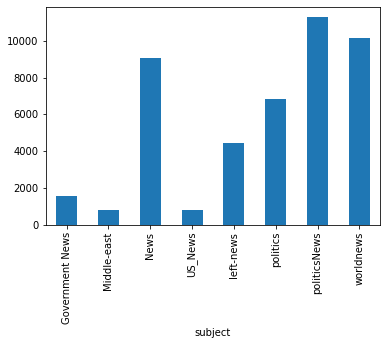

In [ ]:
# subjects
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


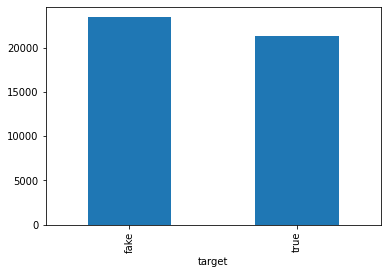

In [ ]:
#  fake and real articles
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

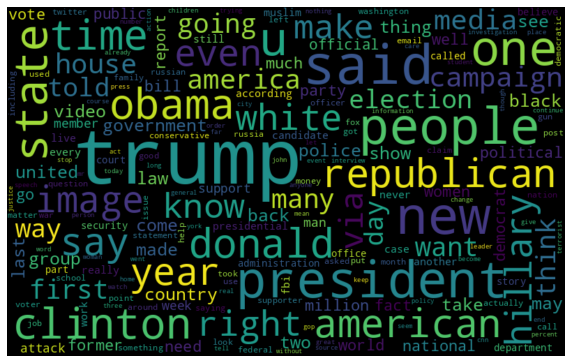

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

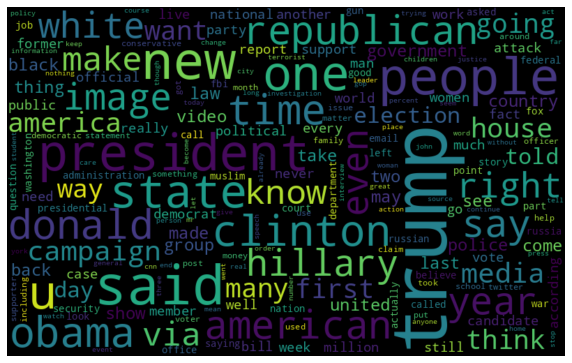

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

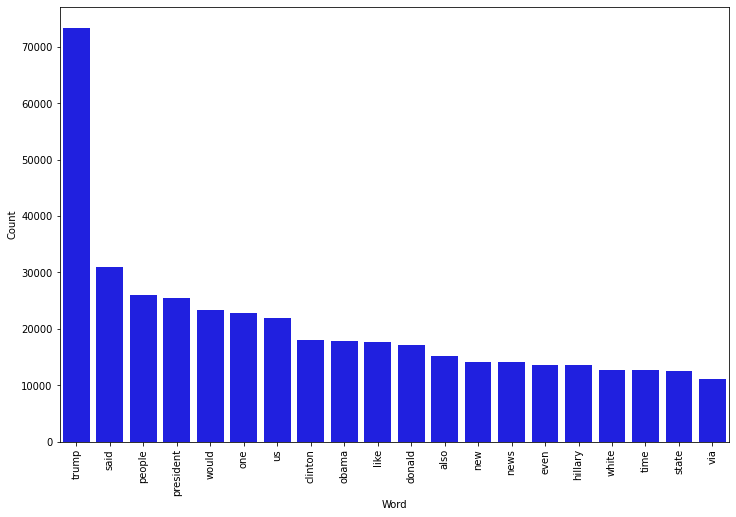

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)


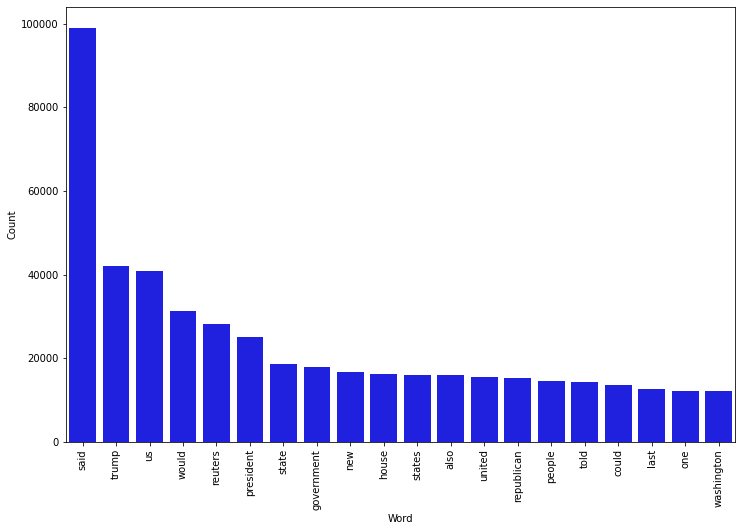

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [ ]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
dat2 = pd.read_csv("/content/gdrive/My Drive/sample_data/news.csv")

In [ ]:
dat2["label"]=dat2["label"].replace("REAL","true")
dat2["label"]=dat2["label"].replace("FAKE","fake")




In [ ]:
dat2["label"]

0       fake
1       fake
2       true
3       fake
4       true
        ... 
6330    true
6331    fake
6332    fake
6333    true
6334    true
Name: label, Length: 6335, dtype: object

SPLITTING THE DATASET

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(dat2_new, dat2.label, test_size=0.2, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(dat2['text'], dat2.label, test_size=0.2, random_state=42)

**MULTINOMINAL NAIVE BAYES**

In [ ]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['NaiveBayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 81.69%


Confusion matrix, without normalization


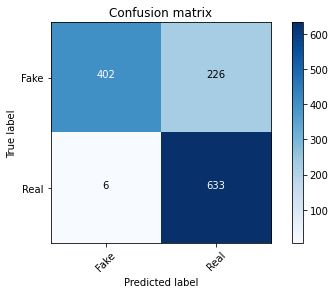

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**LOGISTIC REGRESSION**

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic R'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 91.4%


Confusion matrix, without normalization


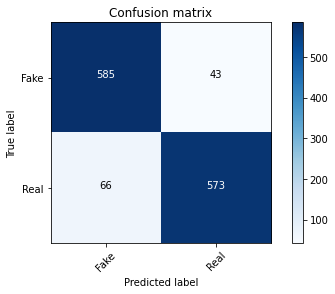

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['DecisionTree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 81.06%


Confusion matrix, without normalization


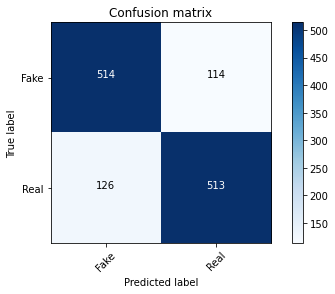

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['RandomForest'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 89.34%


Confusion matrix, without normalization


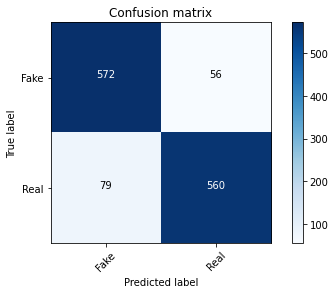

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**SVM**

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.29%


Confusion matrix, without normalization


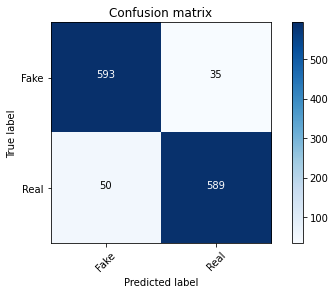

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**Passive Aggressive Classifier**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
import pickle
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',  PassiveAggressiveClassifier(max_iter=50))])

model = pipe.fit(X_train, y_train)
pickle.dump(model,"passaggr.pkl")
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Passive aggresive'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 93.53%


Confusion matrix, without normalization


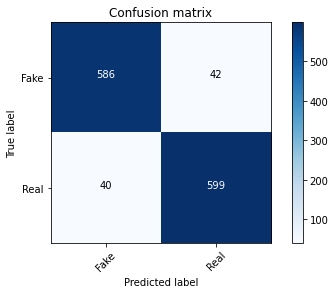

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**DIFFERENT MODEL COMPARISIONS**

([<matplotlib.axis.YTick at 0x7f1289d8bf10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

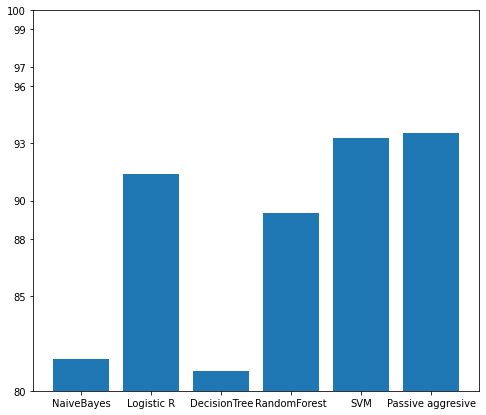

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((80, 85, 88, 90, 93, 96, 97, 99, 100))